In [ ]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/')

In [ ]:
import model_architectures as ma
import fp_utilities as fp_utils
import plot_utilities as plot_utils

In [ ]:
manualSeed = 500

torch.manual_seed(manualSeed)
random.seed(manualSeed)
np.random.seed(manualSeed)

fixed_noise = torch.randn(512,  ma.nz, 1, 1)



In [ ]:
netG1, netG2, netG3 = fp_util.initialise_generators()

In [ ]:
#generate images to compute fingerprints from

fake1_finger = netG1(fixed_noise).detach().numpy().reshape(512,28,28)
fake2_finger = netG2(fixed_noise).detach().numpy().reshape(512,28,28)
fake3_finger = netG3(fixed_noise).detach().numpy().reshape(512,28,28)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=False, download=True, transform=torchvision.transforms.ToTensor()), batch_size=512)
real_finger, _ = next(iter(test_loader))

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
np.save('/content/gdrive/My Drive/Diss/Marra/Images_Fingerprints/GAN_1_images', fake1_finger)
np.save('/content/gdrive/My Drive/Diss/Marra/Images_Fingerprints/GAN_2_images', fake2_finger)
np.save('/content/gdrive/My Drive/Diss/Marra/Images_Fingerprints/GAN_3_images', fake3_finger)
np.save('/content/gdrive/My Drive/Diss/Marra/Images_Fingerprints/Real_images', real_finger)

In [ ]:
def compute_source_fingerprint(gan_num, denoising_method="median blur"):
  fig, ax = plt.subplots(1,4, figsize = (20,15))
  N = [2,8,64,512]
  file_name_load = "GAN_{:d}_images.npy".format(gan_num) if gan_num > 0 else "Real_images.npy"
  images_finger = np.load('/content/gdrive/My Drive/Diss/Marra/Images_Fingerprints/'+file_name_load)
  for ind, num in enumerate(N,0):
    residue_sum = np.zeros((28,28))
    for i in range(num):
      img = images_finger[i]
      residual = fp_util.extract_fingerprint(img, 'Marra', denoising_method)
      residue_sum += residue
    residue_sum /= num
    if(num == 512):
      file_name_save = "print_GAN_{:d}".format(gan_num) if gan_num > 0 else "print_real"
      np.save('/content/gdrive/My Drive/Diss/Marra/Fingerprints/'+file_name_save+'_{}'.format(denoising_method.replace(" ","_")), residue_sum)
    ax[ind].imshow(residue_sum)
    ax[ind].set_title('N = {:d}'.format(num))


## **Evolution of Fingerprints**
Visualising how the fingerprints evolve as the number of residuals used to compute them is increased

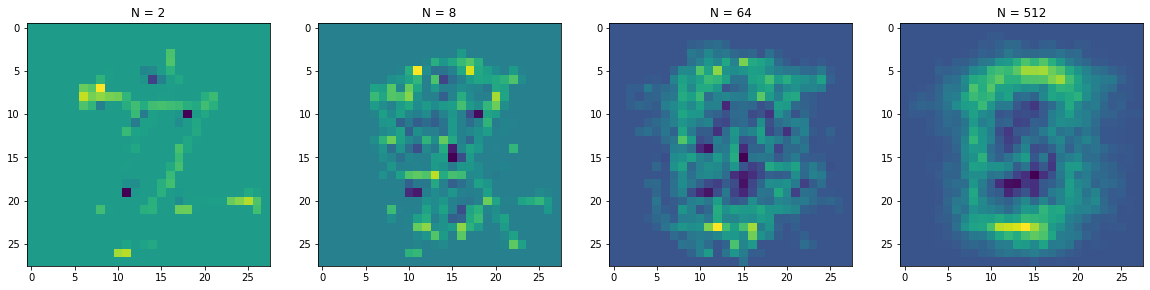

In [ ]:
compute_source_fingerprint(0, "median blur")

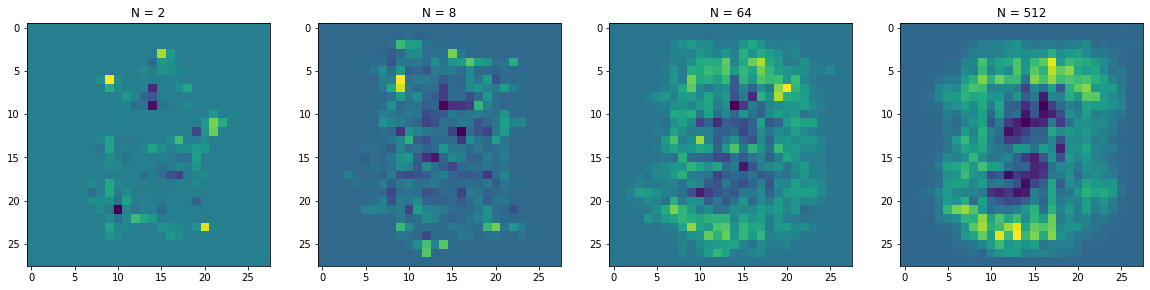

In [ ]:
compute_source_fingerprint(1, "median blur")

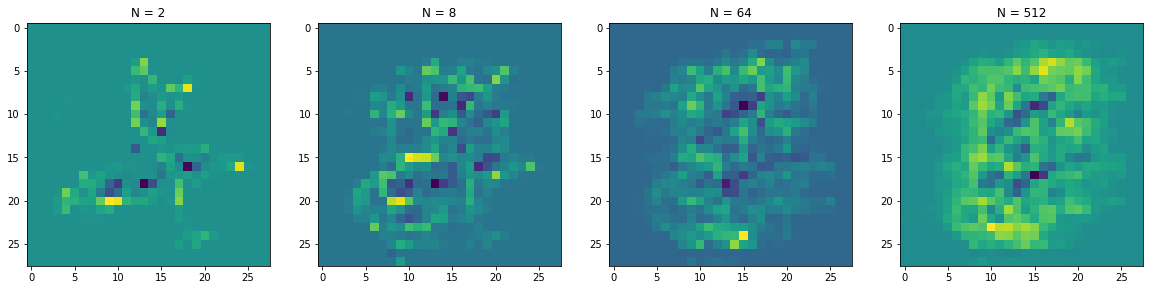

In [ ]:
compute_source_fingerprint(2, "median blur")

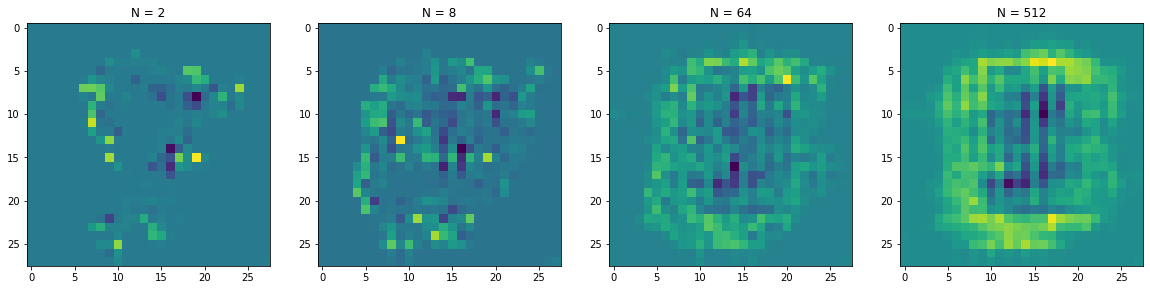

In [ ]:
compute_source_fingerprint(3, "median blur")

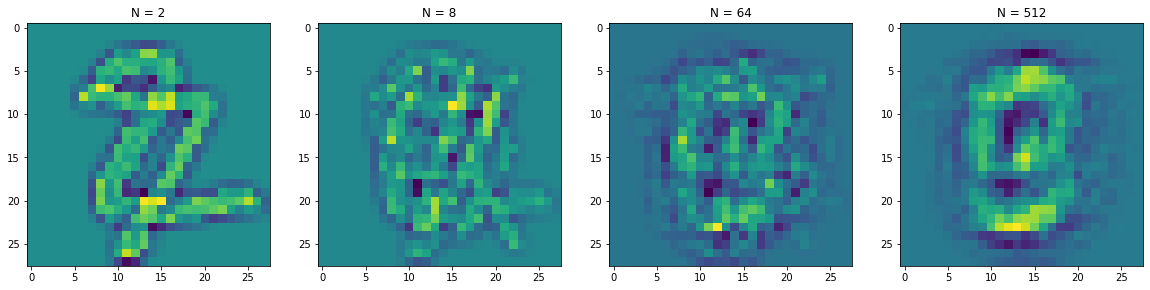

In [ ]:
compute_source_fingerprint(0, "gaussian blur")

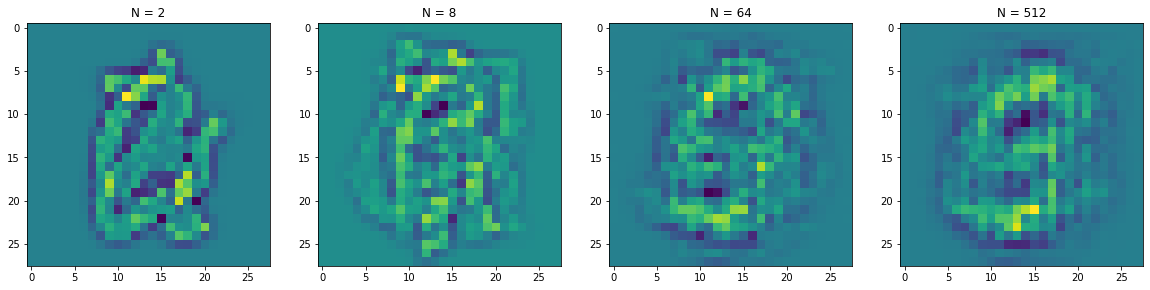

In [ ]:
compute_source_fingerprint(1, "gaussian blur")

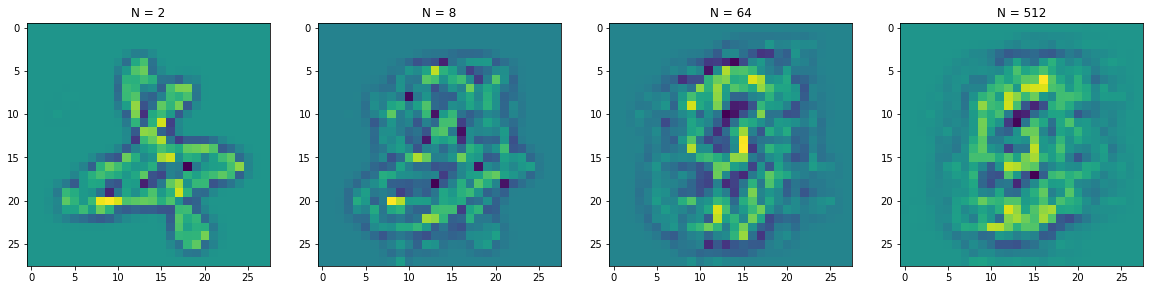

In [ ]:
compute_source_fingerprint(2, "gaussian blur")

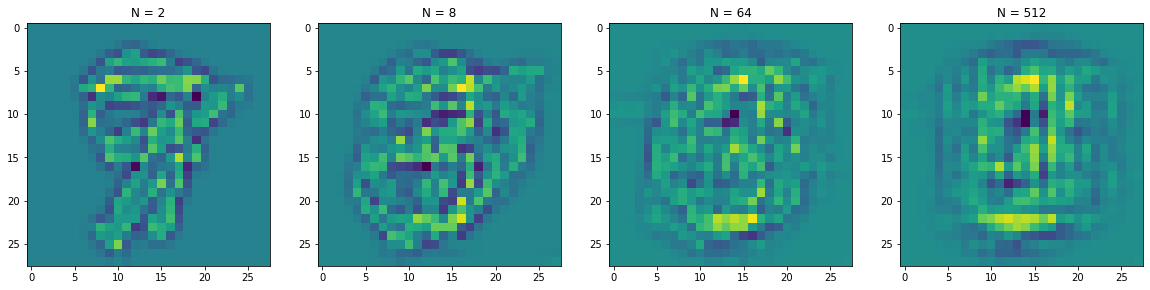

In [ ]:
compute_source_fingerprint(3, "gaussian blur")

## **Handcrafted Fingerprints (Gaussian)**

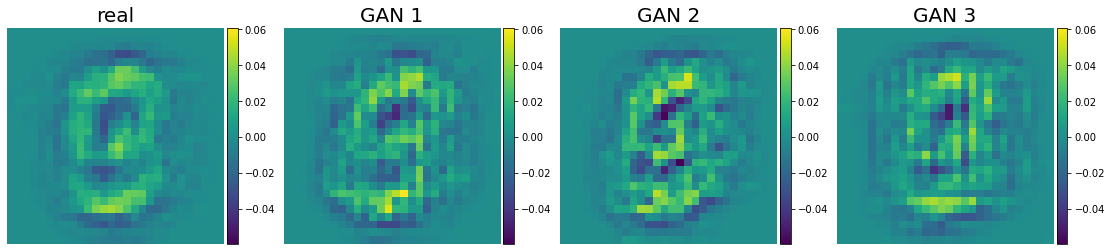

In [ ]:
plot_utils.plot_fingerprints('Marra', 'gaussian blur')

## **Handcrafted Fingerprints (Median)**

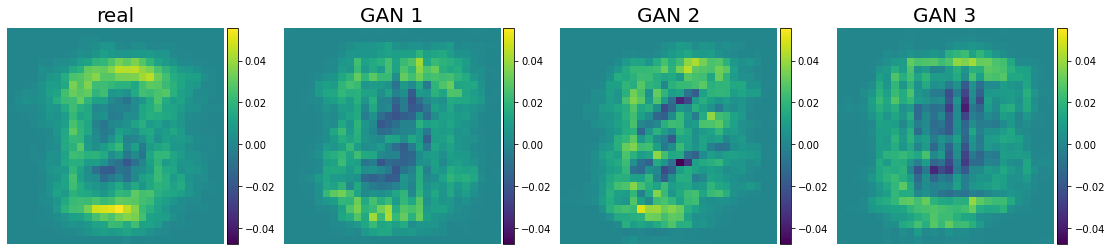

In [ ]:
plot_utils.plot_fingerprints('Marra', 'median blur')